In [ ]:
! pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=2469abcf3e86437d3daf0c6fedbb40102aae6e8ee835d6c2907591635ad1f093
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [2]:
!pip install pydub

In [4]:
import pandas as pd
import numpy as np
import wave
from scipy.io import wavfile
import os
import librosa
import pydub
import ffmpeg
from librosa.feature import melspectrogram
import warnings
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from PIL import Image
from uuid import uuid4
import sklearn
from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, LSTM, SimpleRNN, Conv1D, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
index_df = pd.read_csv('xeno-canto_ca-nv_index.csv')
index_df.head()

FileNotFoundError: ignored

In [ ]:
uniques = index_df['english_cname'].unique()
len(uniques)

91

In [ ]:
print(uniques)

["Abert's Towhee" 'Acorn Woodpecker' 'American Bushtit' 'American Crow'
 'American Dusky Flycatcher' 'American Grey Flycatcher' 'American Robin'
 "Anna's Hummingbird" 'Ash-throated Flycatcher' "Bell's Sparrow"
 "Bell's Vireo" "Bewick's Wren" 'Black Phoebe' 'Black-chinned Sparrow'
 'Black-headed Grosbeak' 'Black-tailed Gnatcatcher'
 'Blue-grey Gnatcatcher' "Brewer's Sparrow" 'California Gnatcatcher'
 'California Quail' 'California Scrub Jay' 'California Thrasher'
 'California Towhee' 'Canyon Wren' "Cassin's Finch" "Cassin's Vireo"
 'Chestnut-backed Chickadee' "Clark's Nutcracker" 'Common Poorwill'
 'Common Yellowthroat' 'Dark-eyed Junco' 'Elegant Tern' 'Flammulated Owl'
 "Forster's Tern" 'Great Horned Owl' 'Green-tailed Towhee' 'Grey Vireo'
 'Hermit Thrush' 'Hermit Warbler' 'House Finch' 'House Wren'
 "Hutton's Vireo" 'Juniper Titmouse' 'Lark Sparrow' 'Lazuli Bunting'
 'Lesser Goldfinch' "Lincoln's Sparrow" 'Long-eared Owl'
 "MacGillivray's Warbler" 'Marsh Wren' 'Mountain Chickadee'
 'M

In [ ]:
# Used this step to create list of folders corresponding to each of the bird names.
# for name in uniques:
#     new_folders = name
#     os.mkdir(new_folders)
    

In [ ]:
index_df.groupby(['english_cname']).count()

,Unnamed: 0,country,duration_seconds,file_id,file_name,file_url,genus,latitude,license,location,longitude,recordist,recordist_url,sonogram_url,species,type,remarks,full_name
english_cname,,,,,,,,,,,,,,,,,,
Abert's Towhee,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Acorn Woodpecker,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
American Bushtit,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
American Crow,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
American Dusky Flycatcher,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White-headed Woodpecker,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Wilson's Warbler,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
Wrentit,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


In [ ]:
#91 different bird species and 30 mp3 samples for each bird.


In [ ]:
#wave_data_wav, wave_rate_wave = librosa.load('test.wav')
#len(wave_data_wav)

In [ ]:
# Test that I can successfully load in an mp3 files using librosa and ffmpeg
wave_data, wave_rate = librosa.load('Practice files/XC4971.mp3')

C:\Users\Pete\anaconda3\envs\gmaps\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
# Look at shape of wave data for single mp3 files
wave_data.shape

(260928,)

In [ ]:
print(wave_rate)

22050


In [ ]:
# use trim to trim leading and ending silence from audio
wave_data, _ = librosa.effects.trim(wave_data)

In [ ]:
wave_data.shape

(260416,)

In [ ]:
print(_)

[   512 260928]


In [ ]:
birds_count = {}
for bird_species, count in zip(index_df.english_cname.unique(), index_df.groupby("english_cname")["english_cname"].count().values):
    birds_count[bird_species] = count
most_represented_birds = [key for key,value in birds_count.items() if value == 30]

index_df = index_df.query("english_cname in @most_represented_birds")

In [ ]:
most_represented_birds

["Abert's Towhee",
 'Acorn Woodpecker',
 'American Bushtit',
 'American Crow',
 'American Dusky Flycatcher',
 'American Grey Flycatcher',
 'American Robin',
 "Anna's Hummingbird",
 'Ash-throated Flycatcher',
 "Bell's Sparrow",
 "Bell's Vireo",
 "Bewick's Wren",
 'Black Phoebe',
 'Black-chinned Sparrow',
 'Black-headed Grosbeak',
 'Black-tailed Gnatcatcher',
 'Blue-grey Gnatcatcher',
 "Brewer's Sparrow",
 'California Gnatcatcher',
 'California Quail',
 'California Scrub Jay',
 'California Thrasher',
 'California Towhee',
 'Canyon Wren',
 "Cassin's Finch",
 "Cassin's Vireo",
 'Chestnut-backed Chickadee',
 "Clark's Nutcracker",
 'Common Poorwill',
 'Common Yellowthroat',
 'Dark-eyed Junco',
 'Elegant Tern',
 'Flammulated Owl',
 "Forster's Tern",
 'Great Horned Owl',
 'Green-tailed Towhee',
 'Grey Vireo',
 'Hermit Thrush',
 'Hermit Warbler',
 'House Finch',
 'House Wren',
 "Hutton's Vireo",
 'Juniper Titmouse',
 'Lark Sparrow',
 'Lazuli Bunting',
 'Lesser Goldfinch',
 "Lincoln's Sparrow",


In [ ]:
def get_sample(filename, bird, output_folder):
    wave_data, wave_rate = librosa.load(filename)
    wave_data, _ = librosa.effects.trim(wave_data)
    #only take 5s samples and add them to the dataframe
    song_sample = []
    sample_length = 5*wave_rate
    samples_from_file = []
    #The variable below is chosen mainly to create a 216x216 image
    N_mels=216
    for idx in range(0,len(wave_data),sample_length): 
        song_sample = wave_data[idx:idx+sample_length]
        if len(song_sample)>=sample_length:
            mel = melspectrogram(song_sample, n_mels=N_mels)
            db = librosa.power_to_db(mel)
            normalised_db = sklearn.preprocessing.minmax_scale(db)
            filename = str(uuid4())+".tif"
            db_array = (np.asarray(normalised_db)*255).astype(np.uint8)
            db_image =  Image.fromarray(np.array([db_array, db_array, db_array]).T)
            db_image.save("{}{}".format(output_folder,filename))
            
            samples_from_file.append({"song_sample":"{}{}".format(output_folder,filename),
                                            "bird":bird})
    return samples_from_file

In [ ]:
warnings.filterwarnings("ignore")
samples_df = pd.DataFrame(columns=["song_sample","bird"])

#We limit the number of audio files being sampled to 1000 in this notebook to save time
#on top of having limited the number of bird species previously
sample_limit = 3000
sample_list = []

output_folder = "/Users/Pete/Desktop/bird_calls_thunder_struck_duck/Peter_S/melspectrogram_dataset/"
os.mkdir(output_folder)
with tqdm(total=sample_limit) as pbar:
    for idx, row in index_df[:sample_limit].iterrows():
        pbar.update(1)
        try:
            audio_file_path = "/Users/Pete/Desktop/Sounds/xeno-canto-ca-nv/"
            audio_file_path += row.english_cname
            
            if row.english_cname in most_represented_birds:
                sample_list += get_sample('{}/{}'.format(audio_file_path, row.file_name), row.english_cname, output_folder)
            else:
                sample_list += get_sample('{}/{}'.format(audio_file_path, row.file_name), "nocall", output_folder)
        except:
            raise
            print("{} is corrupted".format(audio_file_path))
            
samples_df = pd.DataFrame(sample_list)

 91%|██████████████████████████████████████████████████████████████████████▉       | 2730/3000 [50:43<05:01,  1.11s/it]


In [17]:
data_df = pd.read_csv("spectrograph_samples_colab.csv") 
data_df.head()
# samples_df.to_csv('spectrograph_samples.csv')

,Unnamed: 0,song_sample,bird
0,0,melspectrogram_dataset/40e4eead-408f-48e0-bbff...,Abert's Towhee
1,1,melspectrogram_dataset/27d0f12a-e3f7-43b2-86b9...,Abert's Towhee
2,2,melspectrogram_dataset/a9c88a38-b123-49dd-8a2a...,Abert's Towhee
3,3,melspectrogram_dataset/87a393d7-58b8-410d-9f9c...,Abert's Towhee
4,4,melspectrogram_dataset/a5fcb13c-582d-4c4c-a9ce...,Abert's Towhee


In [18]:
del data_df['Unnamed: 0']
data_df.head()

,song_sample,bird
0,melspectrogram_dataset/40e4eead-408f-48e0-bbff...,Abert's Towhee
1,melspectrogram_dataset/27d0f12a-e3f7-43b2-86b9...,Abert's Towhee
2,melspectrogram_dataset/a9c88a38-b123-49dd-8a2a...,Abert's Towhee
3,melspectrogram_dataset/87a393d7-58b8-410d-9f9c...,Abert's Towhee
4,melspectrogram_dataset/a5fcb13c-582d-4c4c-a9ce...,Abert's Towhee


In [19]:
samples_arr = data_df.to_numpy()
samples_arr.shape

(13545, 2)

In [20]:
samples_arr

array([['melspectrogram_dataset/40e4eead-408f-48e0-bbff-ad1d96268739.tif',
        "Abert's Towhee"],
       ['melspectrogram_dataset/27d0f12a-e3f7-43b2-86b9-df59727364e3.tif',
        "Abert's Towhee"],
       ['melspectrogram_dataset/a9c88a38-b123-49dd-8a2a-d7c1c735bada.tif',
        "Abert's Towhee"],
       ...,
       ['melspectrogram_dataset/351f4d5e-fd37-4dcf-809e-a7189a833988.tif',
        'Yellow-breasted Chat'],
       ['melspectrogram_dataset/63d3d6bd-7700-4acb-b9c2-d814d28a0431.tif',
        'Yellow-breasted Chat'],
       ['melspectrogram_dataset/054b5ced-1212-42d1-aa62-6a496b8b7681.tif',
        'Yellow-breasted Chat']], dtype=object)

In [13]:
!unzip melspectrogram_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: melspectrogram_dataset/a12ab17b-bc9e-421a-b910-f5c650f44de0.tif  
  inflating: melspectrogram_dataset/a12c536d-748d-4074-9cb5-a35521c5df82.tif  
  inflating: melspectrogram_dataset/a12d1cb6-00a9-4e6d-8ef9-d282d2017727.tif  
  inflating: melspectrogram_dataset/a12e1089-4f41-400d-b275-8b0e12bad59e.tif  
  inflating: melspectrogram_dataset/a1330a48-f2e9-4b2a-9b61-6a3273fca3b6.tif  
  inflating: melspectrogram_dataset/a13315d2-871a-4de4-839e-8e160d1feb22.tif  
  inflating: melspectrogram_dataset/a1442c97-9a6d-4205-8e69-0edb8ed8e9f0.tif  
  inflating: melspectrogram_dataset/a14aa864-b8f1-4610-a946-99bf609ca2ed.tif  
  inflating: melspectrogram_dataset/a14dbda1-ef80-48bf-8832-660a4de1c8fa.tif  
  inflating: melspectrogram_dataset/a157164c-134e-41ae-bd50-8d4d1317b067.tif  
  inflating: melspectrogram_dataset/a15988f9-b9a0-4817-8e3f-b604d5a4ec92.tif  
  inflating: melspectrogram_dataset/a15bec42-fca5-43f9-b7e2-5e5597dca8b1.tif  
 

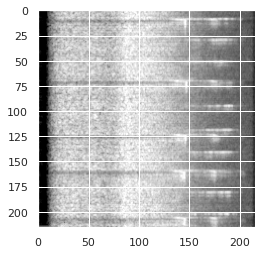

In [45]:
demo_img = Image.open(train.iloc[0].song_sample)
plt.imshow(demo_img)
plt.show()

print(samples_df)


In [ ]:
# Train vs validation split.  Will use 80/20
# training_percentage = 0.8
# training_item_count = int(len(shuffle_df)*training_percentage)
# validation_item_count = len(shuffle_df)-int(len(shuffle_df)*training_percentage)
# training_df = shuffle_df[:training_item_count]
# validation_df = shuffle_df[training_item_count:]


In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_df, stratify=data_df['bird'], test_size=0.2)

In [30]:
train.head()

,song_sample,bird
6125,melspectrogram_dataset/ef527de3-3594-47f0-aa5f...,Hermit Warbler
13483,melspectrogram_dataset/24c52ece-167e-4cfd-8fb1...,Yellow-breasted Chat
9283,melspectrogram_dataset/78c05d95-070a-420d-b185...,Nutting's Flycatcher
2625,melspectrogram_dataset/03803876-63c9-4d74-a5cc...,Blue-grey Gnatcatcher
6458,melspectrogram_dataset/c57c9c1c-8fa5-4c49-947e...,Hutton's Vireo


In [31]:
# Create model and layers
classes_to_predict = sorted(data_df.bird.unique())
input_shape = (216,216, 3)
effnet_layers = EfficientNetB0(weights=None, include_top=False, input_shape=input_shape)

for layer in effnet_layers.layers:
    layer.trainable = True

dropout_dense_layer = 0.3

model = Sequential()
model.add(effnet_layers)
    
model.add(GlobalAveragePooling2D())
model.add(Dense(256, use_bias=False))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(dropout_dense_layer))

model.add(Dense(len(classes_to_predict), activation="softmax"))

["Abert's Towhee",
 'Acorn Woodpecker',
 'American Bushtit',
 'American Crow',
 'American Dusky Flycatcher',
 'American Grey Flycatcher',
 'American Robin',
 "Anna's Hummingbird",
 'Ash-throated Flycatcher',
 "Bell's Sparrow",
 "Bell's Vireo",
 "Bewick's Wren",
 'Black Phoebe',
 'Black-chinned Sparrow',
 'Black-headed Grosbeak',
 'Black-tailed Gnatcatcher',
 'Blue-grey Gnatcatcher',
 "Brewer's Sparrow",
 'California Gnatcatcher',
 'California Quail',
 'California Scrub Jay',
 'California Thrasher',
 'California Towhee',
 'Canyon Wren',
 "Cassin's Finch",
 "Cassin's Vireo",
 'Chestnut-backed Chickadee',
 "Clark's Nutcracker",
 'Common Poorwill',
 'Common Yellowthroat',
 'Dark-eyed Junco',
 'Elegant Tern',
 'Flammulated Owl',
 "Forster's Tern",
 'Great Horned Owl',
 'Green-tailed Towhee',
 'Grey Vireo',
 'Hermit Thrush',
 'Hermit Warbler',
 'House Finch',
 'House Wren',
 "Hutton's Vireo",
 'Juniper Titmouse',
 'Lark Sparrow',
 'Lazuli Bunting',
 'Lesser Goldfinch',
 "Lincoln's Sparrow",


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 7, 7, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327680    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 91)                2

In [40]:
train.head()

,song_sample,bird
6125,melspectrogram_dataset/ef527de3-3594-47f0-aa5f...,Hermit Warbler
13483,melspectrogram_dataset/24c52ece-167e-4cfd-8fb1...,Yellow-breasted Chat
9283,melspectrogram_dataset/78c05d95-070a-420d-b185...,Nutting's Flycatcher
2625,melspectrogram_dataset/03803876-63c9-4d74-a5cc...,Blue-grey Gnatcatcher
6458,melspectrogram_dataset/c57c9c1c-8fa5-4c49-947e...,Hutton's Vireo


In [41]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7),
             EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss="categorical_crossentropy", optimizer='adam')

In [42]:
class_weights = class_weight.compute_class_weight("balanced", classes_to_predict, data_df.bird.values)
class_weights_dict = {i : class_weights[i] for i,label in enumerate(classes_to_predict)}

In [43]:
training_batch_size = 32
validation_batch_size = 32
target_size = (216,216)

train_datagen = ImageDataGenerator(
    rescale=1. / 255
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col='song_sample',
    y_col='bird',
    directory='/',
    target_size=target_size,
    batch_size=training_batch_size,
    shuffle=True,
    class_mode='categorical')


validation_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = validation_datagen.flow_from_dataframe(
    dataframe = test,
    x_col='song_sample',
    y_col='bird',
    directory='/',
    target_size=target_size,
    shuffle=False,
    batch_size=validation_batch_size,
    class_mode='categorical')

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 10836 invalid image filename(s) in x_col="song_sample". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2709 invalid image filename(s) in x_col="song_sample". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [36]:
history = model.fit(train_generator,
          epochs = 20, 
          validation_data=validation_generator,
          callbacks=callbacks)

ValueError: ignored